In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstan

In [31]:
data(tulips)
d <- tulips
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [32]:
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

In [5]:
m8.4 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent + bs*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
) , data=d )

In [6]:
m8.5 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
) , data=d )

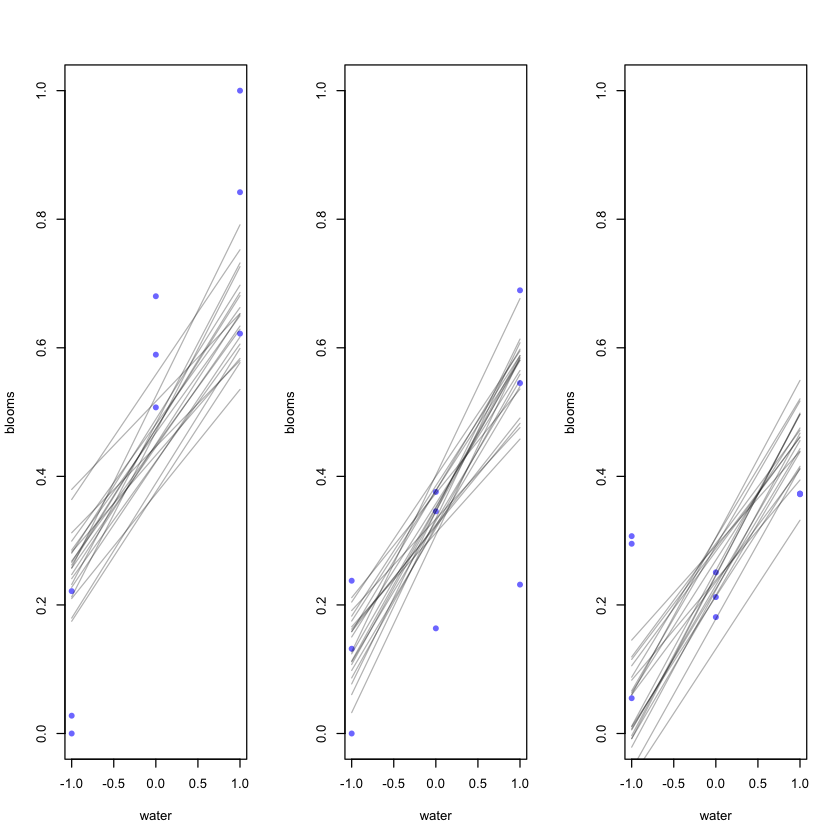

In [7]:
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.4 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    #plot first 20 samples of mu
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

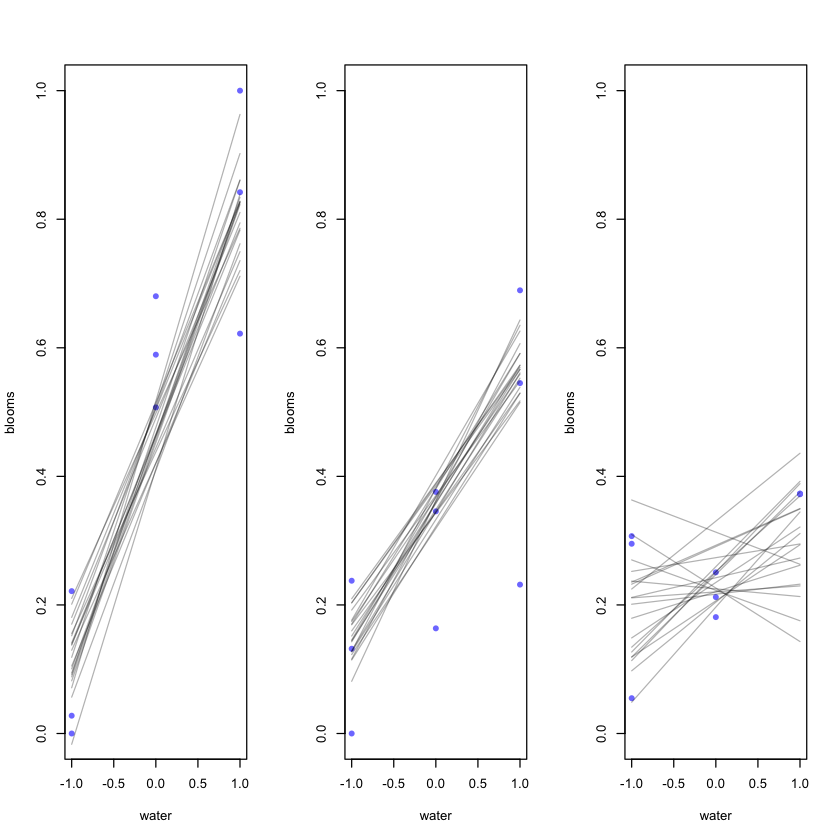

In [13]:
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,1) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    mu <- link( m8.5 , data=data.frame( shade_cent=s , water_cent=-1:1 ) )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

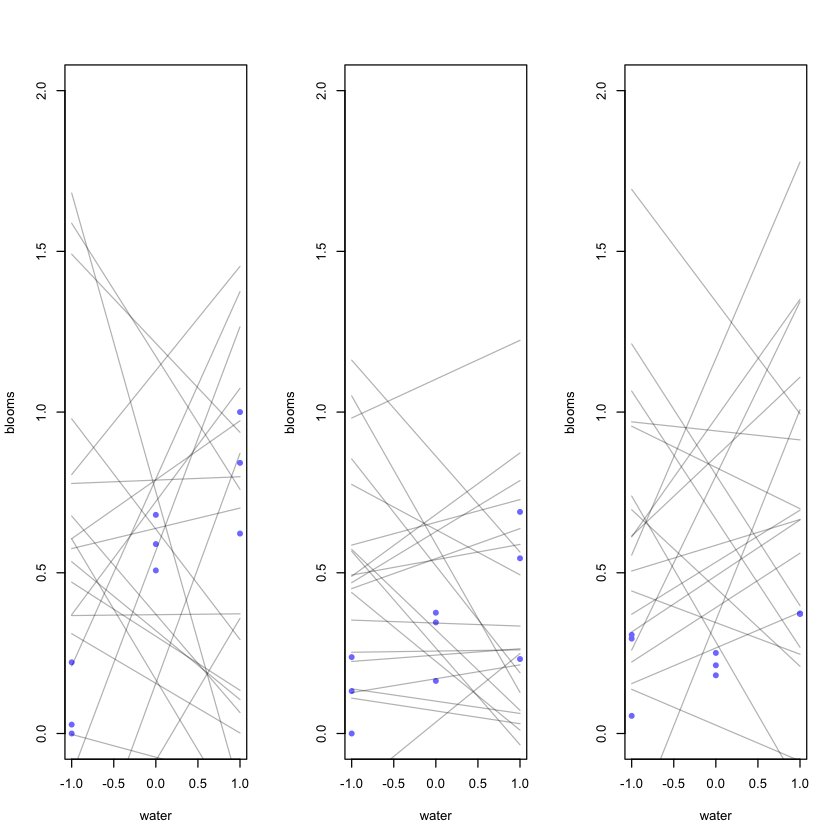

In [16]:
par(mfrow=c(1,3)) # 3 plots in 1 row
for ( s in -1:1 ) {
    idx <- which( d$shade_cent==s )
    plot( d$water_cent[idx] , d$blooms_std[idx] , xlim=c(-1,1) , ylim=c(0,2) ,
        xlab="water" , ylab="blooms" , pch=16 , col=rangi2 )
    prior <- extract.prior(m8.5)
    mu <- link( m8.5 , data=data.frame( shade_cent=s , water_cent=-1:1 ), post=prior )
    for ( i in 1:20 ) lines( -1:1 , mu[i,] , col=col.alpha("black",0.3) )
}

![](./img/8H1-2.png)

In [ ]:
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

In [33]:
d$bed_cat <- as.integer(d$bed)

In [34]:
d

bed,water,shade,blooms,blooms_std,water_cent,shade_cent,bed_cat
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
a,1,1,0.00,0.00000000,-1,-1,1
a,1,2,0.00,0.00000000,-1,0,1
a,1,3,111.04,0.30702870,-1,1,1
a,2,1,183.47,0.50729967,0,-1,1
a,2,2,59.16,0.16357905,0,0,1
a,2,3,76.75,0.21221589,0,1,1
a,3,1,224.97,0.62204833,1,-1,1
a,3,2,83.77,0.23162639,1,0,1
a,3,3,134.95,0.37314052,1,1,1


In [36]:
m8.6 <- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a[bed_cat] + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent ,
        a[bed_cat] ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0 , 0.25 ) ,
        bs ~ dnorm( 0 , 0.25 ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
) , data=d )

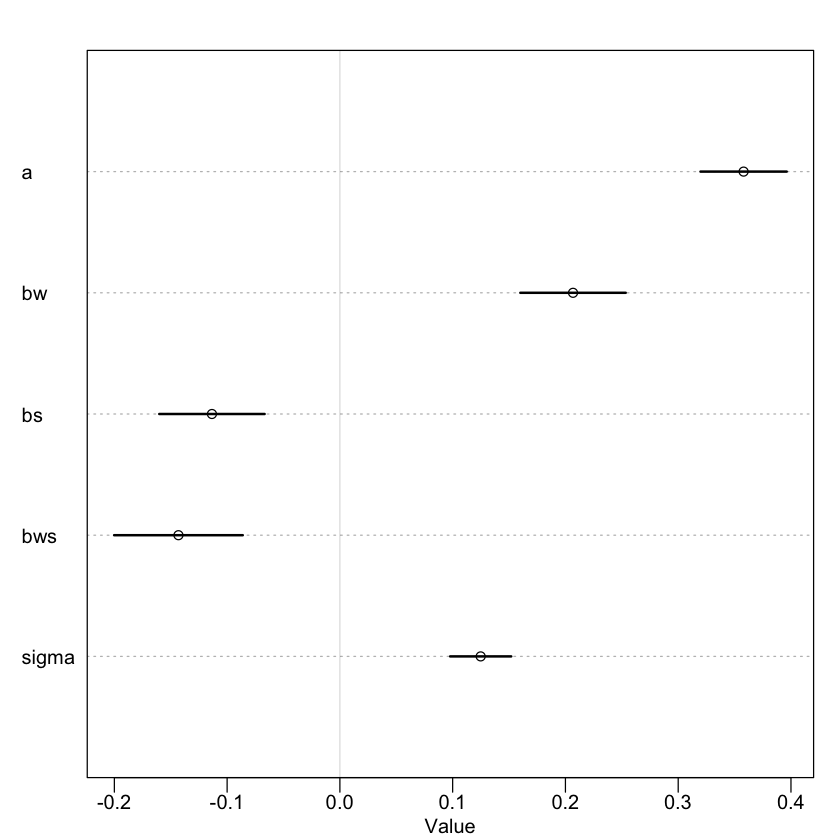

In [37]:
plot(precis(m8.5))

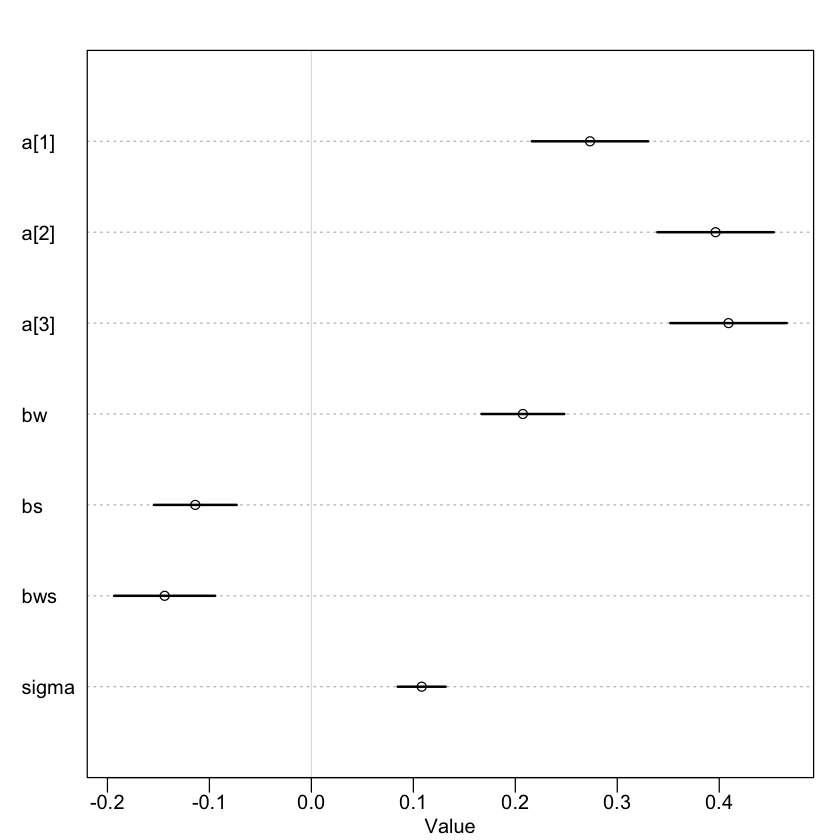

In [40]:
plot(precis(m8.6, depth=2))

In [51]:
compare(m8.4, m8.5, m8.6, func='WAIC')

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.6,-24.58549,9.566136,0.000000,NA,9.157181,0.79531736
m8.5,-21.85845,10.630832,2.727037,7.867781,6.713598,0.20340983
m8.4,-11.71046,9.175322,12.875029,8.504445,5.547295,0.00127281


In [44]:
compare(m8.5, m8.6, func='PSIS')

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.5,-19.53498,12.25930,0.0000000,NA,7.867527,0.5312137
m8.6,-19.28495,11.73755,0.2500351,9.725293,11.813640,0.4687863


In [49]:
PSIS8.5 <- PSIS(m8.5, pointwise = TRUE)
PSIS8.6 <- PSIS(m8.6, pointwise = TRUE)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



In [48]:
d[PSIS8.5$k > .5,]

,bed,water,shade,blooms,blooms_std,water_cent,shade_cent,bed_cat
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,a,1,1,0.00,0.00000000,-1,-1,1
2,a,1,2,0.00,0.00000000,-1,0,1
3,a,1,3,111.04,0.30702870,-1,1,1
5,a,2,2,59.16,0.16357905,0,0,1
7,a,3,1,224.97,0.62204833,1,-1,1
8,a,3,2,83.77,0.23162639,1,0,1
10,b,1,1,80.10,0.22147874,-1,-1,2
12,b,1,3,19.87,0.05494110,-1,1,2
19,c,1,1,10.02,0.02770558,-1,-1,3


In [50]:
d[PSIS8.6$k > .5,]

,bed,water,shade,blooms,blooms_std,water_cent,shade_cent,bed_cat
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,a,1,3,111.04,0.30702870,-1,1,1
7,a,3,1,224.97,0.62204833,1,-1,1
8,a,3,2,83.77,0.23162639,1,0,1
9,a,3,3,134.95,0.37314052,1,1,1
12,b,1,3,19.87,0.05494110,-1,1,2
15,b,2,3,65.48,0.18105403,0,1,2
18,b,3,3,134.93,0.37308522,1,1,2
19,c,1,1,10.02,0.02770558,-1,-1,3
22,c,2,1,246.00,0.68019687,0,-1,3


In [54]:
post8.5 <- extract.samples(m8.5)
post8.6 <- extract.samples(m8.6)

In [56]:
head(post8.6)

0.2208440,0.3572462,0.3868654
0.2761566,0.4303658,0.4265830
0.2319007,0.3793322,0.4486124
0.2737118,0.4079843,0.4140715
0.1953528,0.3735772,0.3934387
0.2274163,0.4105078,0.3881988
0.2637493,0.4634284,0.4047192
0.2715942,0.3761089,0.5023490
0.2643585,0.4026413,0.4129915
0.2774110,0.3633382,0.4273400
0.2862786,0.4241783,0.3968368


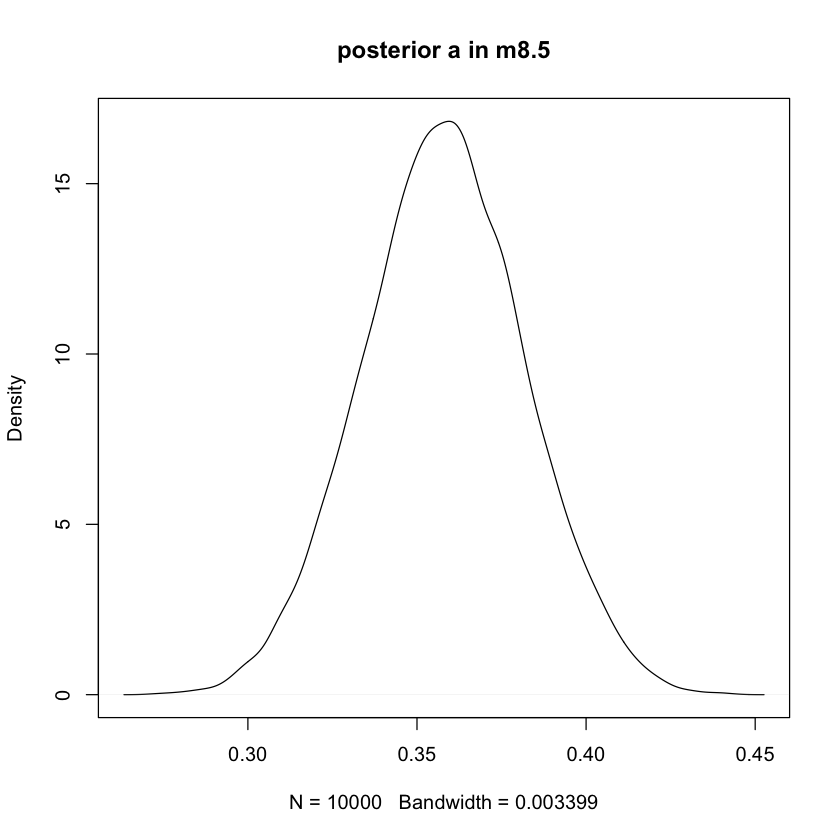

In [63]:
plot(density(post8.5$a), main = "posterior a in m8.5")

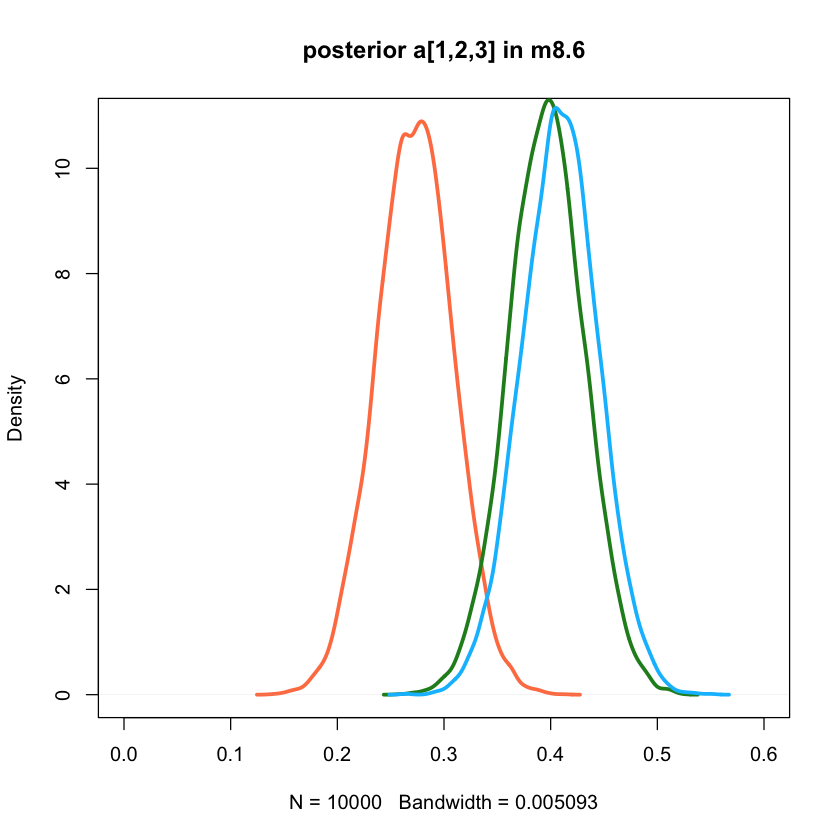

In [73]:
plot(density(post8.6$a[,1]), main = "posterior a[1,2,3] in m8.6", xlim=c(0,.6), col = "coral", lwd=3)
lines(density(post8.6$a[,2]), col = "forestgreen", lwd=3)
lines(density(post8.6$a[,3]), col = "deepskyblue1", lwd=3)